### Question 2: Simulating Markov Chains and Neural Spiking  

In [70]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them
import scipy.optimize as opt
import scipy.linalg as la
from scipy.stats import expon

In [2]:
In = np.array([[0.98, 0.1, 0],
               [0.02, 0.7, 0.05],
               [0, 0.2, 0.95]])

Out = np.array([[0.9, 0.1, 0],
                [0.1, 0.6, 0.1],
                [0, 0.3, 0.9]])

In [44]:
def steady_state(P):
    n = P.shape[0]
    A = np.transpose(P - np.eye(n))
    A = np.vstack([A, np.ones(n)])
    b = np.zeros(n + 1)
    b[-1] = 1  # for sum(x) = 1
    steady_dist = np.linalg.lstsq(A, b, rcond=None)[0]
    return steady_dist

steady_inward = steady_state(np.transpose(In))
steady_outward = steady_state(np.transpose(Out))
p_open_inward = steady_inward[-1]
p_open_outward = steady_outward[-1]

In [63]:
def thesh_and_probs(N_inward, N_outward):
    # N_inward = 1000  # total inward channels
    # N_outward = 500  # total outward channels
    num_trials = 10000  # number of trials for each threshold
    thresholds = np.arange(0, 150, 5)  # range of thresholds to test

    spike_probabilities = []

    for T in thresholds:
        n_inward = np.random.binomial(N_inward, p_open_inward, num_trials)
        n_outward = np.random.binomial(N_outward, p_open_outward, num_trials)
        
        net_current = n_inward - n_outward
        
        spike_probability = np.mean(net_current > T)
        spike_probabilities.append(spike_probability)
    
    return thresholds, spike_probabilities

In [64]:
thresholds_1000_500, spike_probabilities_1000_500 = thesh_and_probs(N_inward=1000, N_outward= 500)
thresholds_500_250, spike_probabilities_500_250 = thesh_and_probs(N_inward=500, N_outward= 250)
thresholds_100_50, spike_probabilities_100_50 = thesh_and_probs(N_inward=100, N_outward= 50)
thresholds_10_5, spike_probabilities_10_5 = thesh_and_probs(N_inward=10, N_outward= 5)

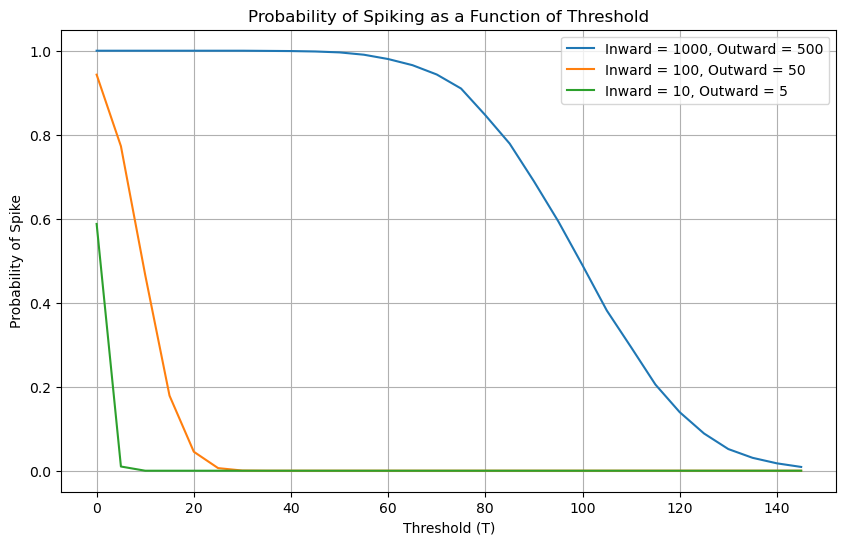

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds_1000_500, spike_probabilities_1000_500, label="Inward = 1000, Outward = 500")
# plt.plot(thresholds_500_250, spike_probabilities_500_250, label="Inward = 500, Outward = 250")
plt.plot(thresholds_100_50, spike_probabilities_100_50, label="Inward = 100, Outward = 50")
plt.plot(thresholds_10_5, spike_probabilities_10_5, label="Inward = 10, Outward = 5")

plt.xlabel("Threshold (T)")
plt.ylabel("Probability of Spike")
plt.title("Probability of Spiking as a Function of Threshold")
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

As the number of inward channels increases, the probability of achieving a higher net inward current also increases. This shifts the spiking probability curve to the right, indicating that a higher threshold T is required to reduce spiking probability to a similar level. Thus, with more inward channels, the cell becomes more likely to spike at higher thresholds.C onversely, increasing the number of outward channels shifts the curve to the left. More outward channels lead to a greater outward current, making it harder for the net inward current to exceed a given threshold. Therefore, the cell requires a lower threshold T to maintain the same spiking probability.